# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | keflavik
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | qaqortoq
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | aykhal
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | valparaiso
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | tolanaro
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | papao
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | nuuk
Processing Record 19 of Set 1 | broken hill
Processing Record 20 of Set 1 | petropavlovsk-kamchatsky
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | road town
Processing Record 23 of Set

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-33.48,100,88,1.05,RU,1707971185
1,keflavik,64.0049,-22.5624,1.24,93,40,4.12,IS,1707971185
2,ushuaia,-54.8000,-68.3000,7.81,66,0,9.26,AR,1707971185
3,talnakh,69.4865,88.3972,-25.66,94,87,1.68,RU,1707971186
4,west island,-12.1568,96.8225,30.99,58,86,5.66,CC,1707971186


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-33.48,100,88,1.05,RU,1707971185
1,keflavik,64.0049,-22.5624,1.24,93,40,4.12,IS,1707971185
2,ushuaia,-54.8000,-68.3000,7.81,66,0,9.26,AR,1707971185
3,talnakh,69.4865,88.3972,-25.66,94,87,1.68,RU,1707971186
4,west island,-12.1568,96.8225,30.99,58,86,5.66,CC,1707971186


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

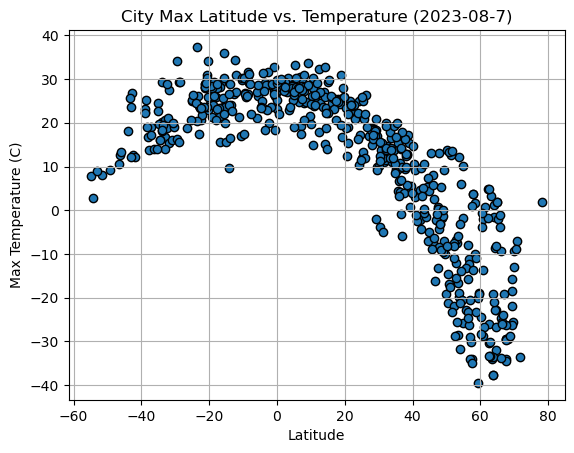

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors ='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2023-08-7)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

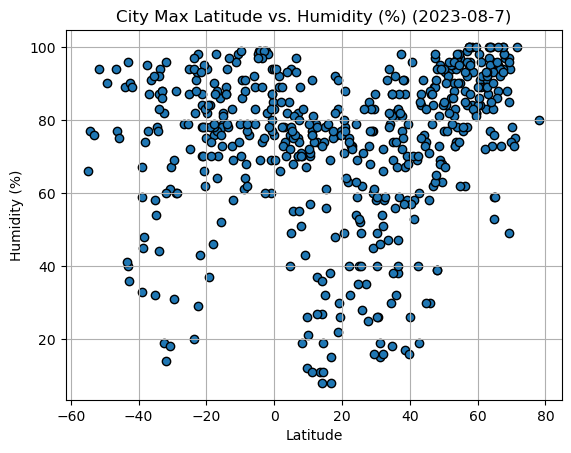

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolors ='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (%) (2023-08-7)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

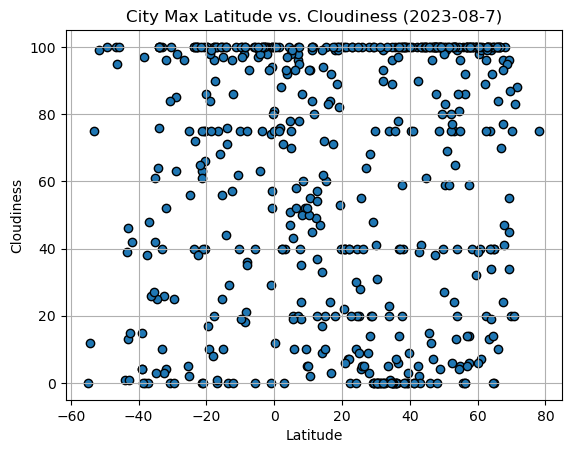

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolors ='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2023-08-7)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

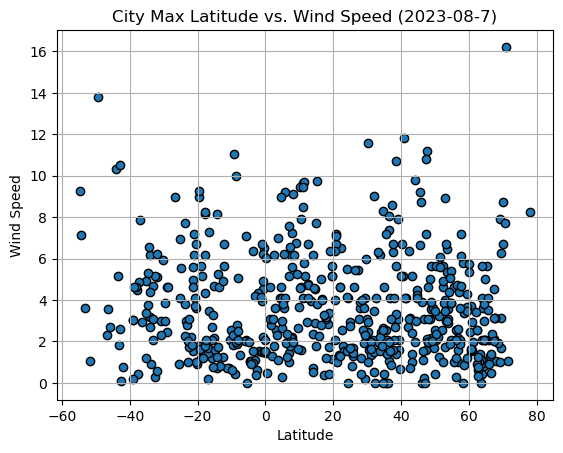

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolors ='black')


# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed (2023-08-7)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def linear_regression_plot(df, x_col, y_col):

    x = df[x_col].values
    y = df[y_col].values
    
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    regression_line = slope * x + intercept
    
    equation = f'y={slope:.2f}x+{intercept:.2f}'
    annotation_position = (np.mean(x), np.max(y))
    plt.annotate(equation, xy=annotation_position, xycoords='data', ha='center', fontsize=14, color='red')            
    
    plt.scatter(x, y, edgecolor='black')
    
    plt.plot(x, regression_line, color='red', linewidth=2)
    
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    
    print(f'The r-value is:{r_value}')
    
    
    plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-33.48,100,88,1.05,RU,1707971185
1,keflavik,64.0049,-22.5624,1.24,93,40,4.12,IS,1707971185
3,talnakh,69.4865,88.3972,-25.66,94,87,1.68,RU,1707971186
5,qaqortoq,60.7167,-46.0333,-1.89,91,100,3.72,GL,1707971186
6,jamestown,42.0970,-79.2353,-2.23,69,100,2.68,US,1707971118


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<=0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,7.81,66,0,9.26,AR,1707971185
4,west island,-12.1568,96.8225,30.99,58,86,5.66,CC,1707971186
7,grytviken,-54.2811,-36.5092,2.79,77,12,7.16,GS,1707971186
9,papatowai,-46.5619,169.4708,10.60,94,100,2.31,NZ,1707971186
10,valparaiso,-33.0393,-71.6273,16.80,88,40,2.06,CL,1707971186


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8753575999105819


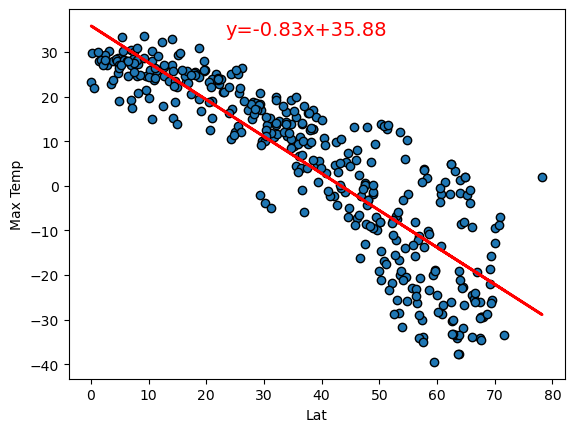

In [27]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat','Max Temp')

The r-value is:0.5895172755344598


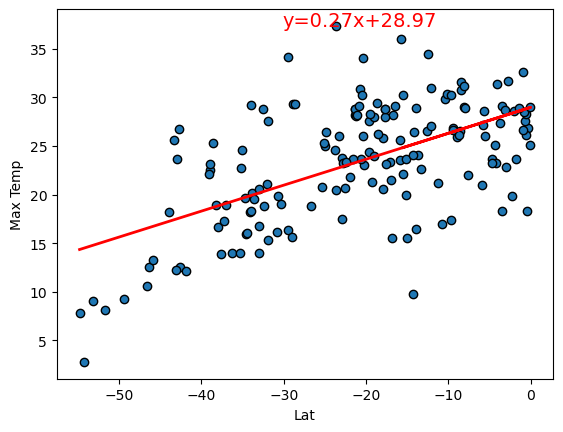

In [28]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat','Max Temp')

**Discussion about the linear relationship:** After reviewing the graphs, we can see that as we move futher away from the equator, on both sides southern and northern, the temperature starts dropping.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.4084906372981155


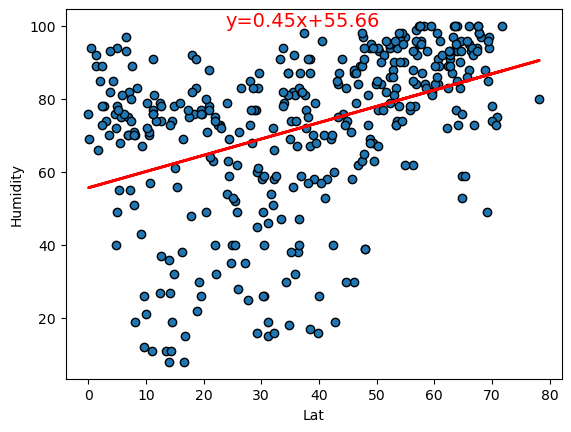

In [29]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat','Humidity')

The r-value is:0.24927892261709547


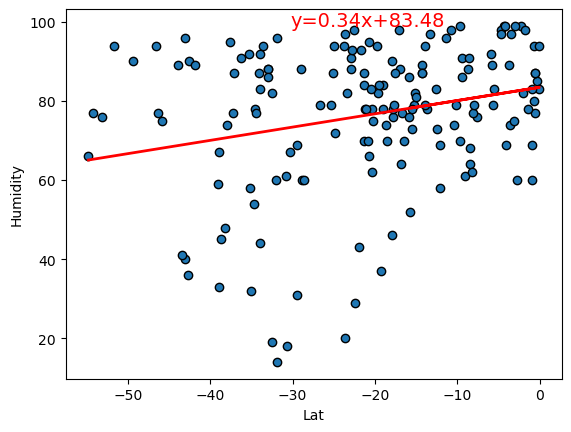

In [30]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat','Humidity')

**Discussion about the linear relationship:** The northern hemisphere incrreases in humidity as latitude increases. Humidity decreases towards southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.13573661600647613


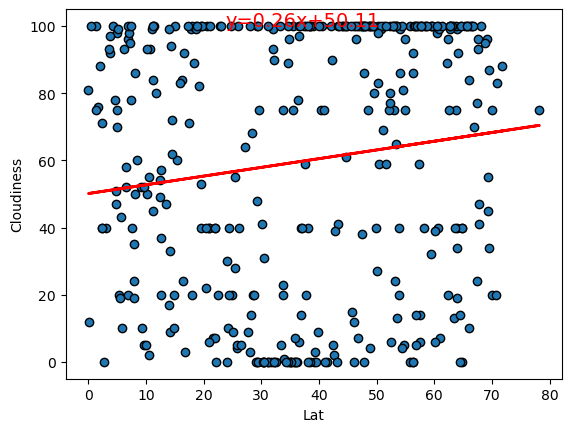

In [31]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat','Cloudiness')

The r-value is:0.2983377902505206


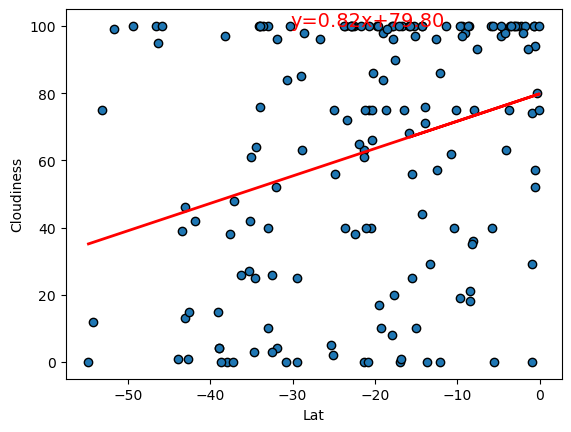

In [32]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat','Cloudiness')

**Discussion about the linear relationship:** It's cloudier in the northern hemisphere compared to sounther hemisphere. Decrease in cloudiness is prevelent heading towards southern hemisphere from the equator. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:-0.11378134212743714


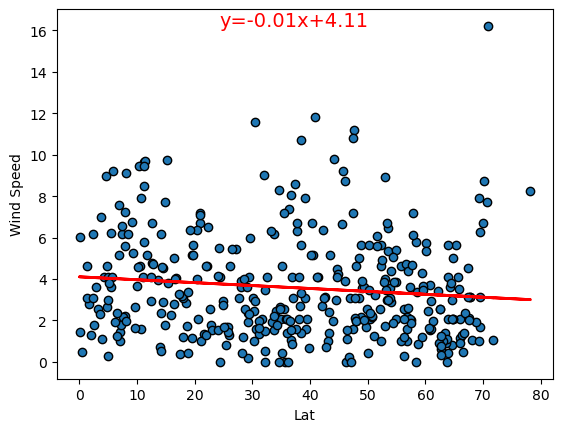

In [33]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat','Wind Speed')

The r-value is:-0.2050676139536851


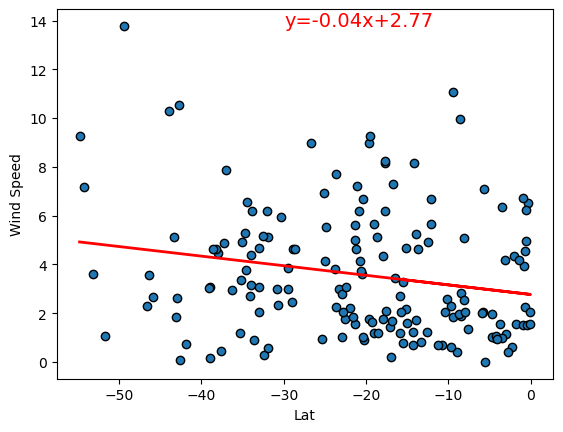

In [34]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat','Wind Speed')

**Discussion about the linear relationship:** Wind speed tend to be a constant towards northern hemisphere while we notice that wind speed increases toward southern part of the world.